### Prelimenary EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
ais_tracks_path = '../data/tracks_ais.csv'
radar_tracks_path = '../data/tracks_radar.csv'
radar_detections_path = '../data/detections_radar.csv'
tagged_detections_path = '../data/detections_tagged.csv'
tracks_tagged_path = '../data/tracks_tagged.csv'


ais_tracks = pd.read_csv(ais_tracks_path)
radar_tracks = pd.read_csv(radar_tracks_path)
radar_detections = pd.read_csv(radar_detections_path)
tagged_detections = pd.read_csv(tagged_detections_path)
tracks_tagged = pd.read_csv(tracks_tagged_path)

print("Length of ais_tracks:", len(ais_tracks))
print("Length of radar_tracks:", len(radar_tracks))
print("Length of radar_detections:", len(radar_detections))
print("Length of tagged_detections:", len(tagged_detections))
print("Length of tracks_tagged:", len(tracks_tagged))

Length of ais_tracks: 27298
Length of radar_tracks: 21725
Length of radar_detections: 7387790
Length of tagged_detections: 6756272
Length of tracks_tagged: 9013


In [2]:
radar_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21725 entries, 0 to 21724
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_track      21725 non-null  int64  
 1   id_site       21725 non-null  int64  
 2   id_m2         21725 non-null  object 
 3   source        21725 non-null  object 
 4   duration      21529 non-null  float64
 5   alarm         21725 non-null  int64  
 6   min_speed     21725 non-null  float64
 7   max_speed     21725 non-null  float64
 8   avg_speed     21529 non-null  float64
 9   curviness     21529 non-null  float64
 10  heading_mean  21529 non-null  float64
 11  heading_std   21529 non-null  float64
 12  turning_mean  21529 non-null  float64
 13  turning_std   21529 non-null  float64
 14  duration_z    21725 non-null  int64  
 15  distance      21725 non-null  float64
 16  distance_o    21725 non-null  float64
 17  assoc_str     21725 non-null  int64  
 18  assoc_id      21725 non-nu

In [3]:
ais_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27298 entries, 0 to 27297
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_track      27298 non-null  int64  
 1   id_site       27298 non-null  int64  
 2   id_m2         27298 non-null  object 
 3   source        27298 non-null  object 
 4   duration      27150 non-null  float64
 5   alarm         27298 non-null  int64  
 6   min_speed     27298 non-null  float64
 7   max_speed     27298 non-null  float64
 8   avg_speed     27150 non-null  float64
 9   curviness     27150 non-null  float64
 10  heading_mean  27150 non-null  float64
 11  heading_std   27150 non-null  float64
 12  turning_mean  27150 non-null  float64
 13  turning_std   27150 non-null  float64
 14  duration_z    27298 non-null  int64  
 15  distance      27298 non-null  float64
 16  distance_o    27298 non-null  float64
 17  assoc_str     27298 non-null  int64  
 18  assoc_id      27298 non-nu

In [4]:
tracks_tagged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_track      9013 non-null   int64  
 1   id_site       9013 non-null   int64  
 2   id_m2         9013 non-null   object 
 3   source        9013 non-null   object 
 4   duration      9013 non-null   int64  
 5   alarm         9013 non-null   int64  
 6   min_speed     9013 non-null   float64
 7   max_speed     9013 non-null   float64
 8   avg_speed     9013 non-null   float64
 9   curviness     9013 non-null   float64
 10  heading_mean  9013 non-null   float64
 11  heading_std   9013 non-null   float64
 12  turning_mean  9013 non-null   float64
 13  turning_std   9013 non-null   float64
 14  duration_z    9013 non-null   int64  
 15  distance      9013 non-null   float64
 16  distance_o    9013 non-null   float64
 17  assoc_str     191 non-null    float64
 18  assoc_id      191 non-null  

There might be many-to-one relationship for radar-ais matching:

In [5]:
matched_ais_ids = list(set(ais_tracks["id_track"]) & set(radar_tracks["assoc_id"]))
matched_radar_ids = list(set(radar_tracks["id_track"]) & set(ais_tracks["assoc_id"]))
print(len(matched_ais_ids), len(matched_radar_ids))

16892 16796


In [6]:
# Investigate if multiple radar records are matched to the same ais record:
AIS_matchings = dict.fromkeys(set(ais_tracks["id_track"]), 0)
num_radar_tracks_no_match = 0
for ais_id in radar_tracks["assoc_id"]:
    if ais_id not in AIS_matchings:
        num_radar_tracks_no_match += 1 
    else:
        AIS_matchings[ais_id] += 1
print("Number of radar tracks with no matching: ", num_radar_tracks_no_match)
AIS_match_frequency = dict()
for v in AIS_matchings.values():
    AIS_match_frequency[v] = AIS_match_frequency.get(v, 0) + 1
for k in sorted(AIS_match_frequency.keys()):
    print("Number of AIS records with {:<2} matching radar records: {:<8}".format(k, AIS_match_frequency[k]))

Number of radar tracks with no matching:  1449
Number of AIS records with 0  matching radar records: 10406   
Number of AIS records with 1  matching radar records: 14517   
Number of AIS records with 2  matching radar records: 1805    
Number of AIS records with 3  matching radar records: 320     
Number of AIS records with 4  matching radar records: 159     
Number of AIS records with 5  matching radar records: 50      
Number of AIS records with 6  matching radar records: 24      
Number of AIS records with 7  matching radar records: 4       
Number of AIS records with 8  matching radar records: 5       
Number of AIS records with 9  matching radar records: 5       
Number of AIS records with 10 matching radar records: 1       
Number of AIS records with 11 matching radar records: 1       
Number of AIS records with 25 matching radar records: 1       


In [7]:
# Investigate if multiple ais records are matched to the same radar records:
radar_matchings = dict.fromkeys(set(radar_tracks["id_track"]), 0)
num_ais_tracks_no_match = 0
for radar_id in ais_tracks["assoc_id"]:
    if radar_id not in radar_matchings:
        num_ais_tracks_no_match += 1 
    else:
        radar_matchings[radar_id] += 1
print("Number of ais tracks with no matching: ", num_ais_tracks_no_match)
radar_match_frequency = dict()
for v in radar_matchings.values():
    radar_match_frequency[v] = radar_match_frequency.get(v, 0) + 1
for k in sorted(radar_match_frequency.keys()):
    print("Number of radar records with {:<2} matching AIS records: {:<8}".format(k, radar_match_frequency[k]))

Number of ais tracks with no matching:  9973
Number of radar records with 0  matching AIS records: 4929    
Number of radar records with 1  matching AIS records: 16334   
Number of radar records with 2  matching AIS records: 416     
Number of radar records with 3  matching AIS records: 34      
Number of radar records with 4  matching AIS records: 8       
Number of radar records with 5  matching AIS records: 1       
Number of radar records with 6  matching AIS records: 2       
Number of radar records with 8  matching AIS records: 1       


In [8]:
# Investigate matching from the tagged tracking data
AIS_matchings = dict.fromkeys(set(ais_tracks["id_track"]), 0)
num_radar_tracks_no_match = 0
for ais_id in tracks_tagged["assoc_id"]:
    if ais_id not in AIS_matchings:
        num_radar_tracks_no_match += 1 
    else:
        AIS_matchings[ais_id] += 1
print("Number of tagged tracks with no matching: ", num_radar_tracks_no_match)
AIS_match_frequency = dict()
for v in AIS_matchings.values():
    AIS_match_frequency[v] = AIS_match_frequency.get(v, 0) + 1
for k in sorted(AIS_match_frequency.keys()):
    print("Number of AIS records with {:<2} matching radar records: {:<8}".format(k, AIS_match_frequency[k]))
    

radar_matchings = dict.fromkeys(set(tracks_tagged["id_track"]), 0)
num_ais_tracks_no_match = 0
for radar_id in ais_tracks["assoc_id"]:
    if radar_id not in radar_matchings:
        num_ais_tracks_no_match += 1 
    else:
        radar_matchings[radar_id] += 1
print("Number of ais tracks with no matching: ", num_ais_tracks_no_match)
radar_match_frequency = dict()
for v in radar_matchings.values():
    radar_match_frequency[v] = radar_match_frequency.get(v, 0) + 1
for k in sorted(radar_match_frequency.keys()):
    print("Number of radar records with {:<2} matching AIS records: {:<8}".format(k, radar_match_frequency[k]))

Number of tagged tracks with no matching:  9000
Number of AIS records with 0  matching radar records: 27285   
Number of AIS records with 1  matching radar records: 13      
Number of ais tracks with no matching:  27162
Number of radar records with 0  matching AIS records: 8885    
Number of radar records with 1  matching AIS records: 120     
Number of radar records with 2  matching AIS records: 8       


In [9]:
# Compute the number of records with valid activity tag: 
np.count_nonzero(np.sum(tracks_tagged[["transit", "overnight", "loiter", "cleanup", "fishing_c", "fishing_r", "research", "diving", "repairs", "distress", "other"]].to_numpy(), axis = 1))

591

Trajectory Detection Data

In [10]:
ids_from_detection = radar_detections["id_track"].unique()
ids_from_tracks = radar_tracks["id_track"].unique()
print(f"Detection Tracks {len(ids_from_detection)}, Track Tracks {len(ids_from_tracks)},\
      Shared Tracks {len(set(ids_from_detection) & set(ids_from_tracks))}")

Detection Tracks 19947, Track Tracks 21725,      Shared Tracks 19947


### Linking AIS Records with Radar Records

From the analysis above, it seems that all tracks in the radar detection file has a corresponding record in the radar track file.
However, there are some tracks in the radar track file with no corresponding detection trajectory in the radar detection file.

In [11]:
tracks_with_detection = radar_tracks[radar_tracks["id_track"].isin(ids_from_detection)]
tracks_with_detection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19947 entries, 5 to 21724
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_track      19947 non-null  int64  
 1   id_site       19947 non-null  int64  
 2   id_m2         19947 non-null  object 
 3   source        19947 non-null  object 
 4   duration      19751 non-null  float64
 5   alarm         19947 non-null  int64  
 6   min_speed     19947 non-null  float64
 7   max_speed     19947 non-null  float64
 8   avg_speed     19751 non-null  float64
 9   curviness     19751 non-null  float64
 10  heading_mean  19751 non-null  float64
 11  heading_std   19751 non-null  float64
 12  turning_mean  19751 non-null  float64
 13  turning_std   19751 non-null  float64
 14  duration_z    19947 non-null  int64  
 15  distance      19947 non-null  float64
 16  distance_o    19947 non-null  float64
 17  assoc_str     19947 non-null  int64  
 18  assoc_id      19947 non-null  i

In [12]:
# Do some preliminary cleaning for the radar tracks:
# * Removes all tracks with less than 50 detection points
# * Removes irrelevant columns
track_radar_data = tracks_with_detection.drop(columns=["id_m2", "source", "alarm", "tagged", "has_photos"])
track_radar_data = track_radar_data[track_radar_data["detections"] >= 50]
track_radar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19535 entries, 5 to 21724
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_track      19535 non-null  int64  
 1   id_site       19535 non-null  int64  
 2   duration      19348 non-null  float64
 3   min_speed     19535 non-null  float64
 4   max_speed     19535 non-null  float64
 5   avg_speed     19348 non-null  float64
 6   curviness     19348 non-null  float64
 7   heading_mean  19348 non-null  float64
 8   heading_std   19348 non-null  float64
 9   turning_mean  19348 non-null  float64
 10  turning_std   19348 non-null  float64
 11  duration_z    19535 non-null  int64  
 12  distance      19535 non-null  float64
 13  distance_o    19535 non-null  float64
 14  assoc_str     19535 non-null  int64  
 15  assoc_id      19535 non-null  int64  
 16  confidence    19535 non-null  float64
 17  detections    19535 non-null  int64  
 18  sdate         19535 non-null  o

#### Struct for Linking Radar Records with AIS Records
Remarks
* We allow many radar tracks to be matched to one AIS track
* We only allow one AIS track to be assigned to each radar track.

In [13]:
from tqdm import tqdm
class LinkData():
    def __init__(self, radar_data, AIS_data):
        self.radar = radar_data
        self.ais = AIS_data

        self.counter = {
            "ais <-> radar" : 0,    # Bi-directional link between ais candidate and radar record code (1)
            "ais --> radar" : 0,    # Associated an AIS record pointing at radar, but radar does not point to the same AIS record code (2)
            "ais <-- radar" : 0,    # Radar points to an AIS, but no AIS points back to radar code (3)
            "ais -x- radar" : 0     # No Association what so ever... code (0)
        }
        # Staged constants
        self.ais_ids = set(self.ais["id_track"])    # A set of all valid AIS ids
        self.linked_ids = pd.array([0] * len(self.radar), dtype = pd.Int64Dtype())
                                   # A column corresponding to the linked AIS ids for radar tracks
        self.linked_types = pd.array([0] * len(self.radar))
        
    def _link_function(self, row:pd.Series):
        """
        For each row / record in the radar dataset, attempts to find an AIS record 
        that matches with the radar record.
        """
        radar_track_id = row["id_track"]        # Radar Track ID
        assoc_id_in_radar = row["assoc_id"]     # AIS ID Radar is pointing to
        
        # Query all AIS records pointing to the radar record.
        ais_assoc = self.ais[self.ais["assoc_id"] == radar_track_id]
        
        # No AIS record points to the radar record, but see if the radar record points to a valid AIS record:
        if len(ais_assoc) == 0:
            if assoc_id_in_radar not in self.ais_ids:
                self.counter["ais -x- radar"] += 1
                return pd.NA, 0
            # link the pointed ais record.
            self.counter["ais <-- radar"] += 1
            return assoc_id_in_radar, 3
        # In case there are multiple AIS records pointing to the radar record, 
        # Get the AIS ID with the strongest association id.
        ais_assoc = ais_assoc.sort_values(by = ["assoc_str"], ascending = False)
        ais_candidate = ais_assoc.iloc[0]["id_track"]
        # Check if the ais_candidate agrees with the assoc_id
        if assoc_id_in_radar == ais_candidate:
            self.counter["ais <-> radar"] += 1
            return ais_candidate, 1
        else:
            self.counter["ais --> radar"] += 1
            return ais_candidate, 2
    
    def apply(self):
        """
        Apply Linking for the radar data
        """
        for i in tqdm(range(len(self.radar))):
            self.linked_ids[i], self.linked_types[i] = self._link_function(self.radar.iloc[i])
        return
    
    def report(self):
        """
        Report the linking result
        """ 
        for k, v in self.counter.items():
            print(f"{k} : {v} / {len(self.radar)}")
        
    def get_result(self):
        return self.linked_ids
    
    def get_types(self):
        return self.linked_types

In [14]:
link = LinkData(track_radar_data, ais_tracks)

In [15]:
link.apply()

100%|██████████| 19535/19535 [00:09<00:00, 2078.61it/s]


In [16]:
link.report()

ais <-> radar : 15068 / 19535
ais --> radar : 141 / 19535
ais <-- radar : 3139 / 19535
ais -x- radar : 1187 / 19535


We expect most of the links would be one-to-one association.

In [17]:
track_radar_data["ais_id"] = link.get_result()
radar_linked = track_radar_data[link.get_types() != 0]
len(radar_linked)

18348

In [18]:
radar_linked_bidirectional = track_radar_data[link.get_types() == 1]
len(radar_linked_bidirectional)

15068

### Investigating correctness of summary statistics computation

Investigate the summary statistics issues between linked radar and ais tracks

In [19]:
from utils.track_summary import *

detections_cleaned = pd.read_csv("../data/detections_radar_cached.csv")
summary_generator = SumStats(detections_cleaned)

summary_columns = [
            "duration"  ,
            "max_speed"  ,  
            "min_speed"   , 
            "avg_speed"    , 
            "curviness"    ,
            "heading_mean"  ,
            "heading_std"  ,
            "turning_mean"  ,
            "turning_std"  ,
            "distance"     ,
            "distance_o"   ,
            "detections"   
]

In [20]:
# Generate a random index to investigate
i = np.random.randint(0, len(radar_linked))
tr = radar_linked.iloc[i]
ta = ais_tracks[ais_tracks["id_track"] == tr["ais_id"]].iloc[0]
tr_recompute = summary_generator(tr["id_track"])
tmp = np.vstack( (tr[summary_columns],tr_recompute, ta[summary_columns], ) )
pd.DataFrame(tmp, columns = summary_columns, index=["radar", "radar_computed", "ais "])

,duration,max_speed,min_speed,avg_speed,curviness,heading_mean,heading_std,turning_mean,turning_std,distance,distance_o,detections
radar,1739.0,18.89,11.7,15.051976,1.022616,-17.652082,0.139994,0.419444,0.629609,13.570035,13.269926,253
radar_computed,1731.0,18.89,11.7,15.051976,1.022604,-17.652082,0.139994,0.419444,0.629609,13.569812,13.269864,253.0
ais,10563.0,15.7,1.4,13.156557,1.304483,-2.514654,0.720487,0.80985,2.053514,66.597452,51.05277,732


### Detecting Disrupted Tracks:
Units: Meters for distance Metric, Meters / Sec for speed Metric

In [25]:
from tqdm import tqdm
# Alias some of the dataframes above for ease of access
pd.options.mode.copy_on_write = True
detections = detections_cleaned
radar = radar_linked_bidirectional.copy()

haversine_distance = SumStats._haversine_distance # This function returns distance in km

def detect_instantaneous_jump(detections_df, track_id):
    """
    Helper function for detecting instantaneous jumps in the detections data

    Args:
        detections_df: 
        track_id: 
    
    Returns:
        (max_instantanous_speed, max_instantaneous_distance)
    """
    detections = detections_df[detections_df["id_track"] == track_id]
    detections = detections.sort_values(by = "time", ascending=True)
    n = len(detections)

    def instant_dist_helper(i):
        return haversine_distance(
                detections["latitude"].iloc[i], detections["longitude"].iloc[i],
                detections["latitude"].iloc[i+1], detections["longitude"].iloc[i+1]
            ) * 1000
        
    def instant_time_helper(i):
        return detections["time"].iloc[i+1] - detections["time"].iloc[i]
    
    instant_dists = np.array([instant_dist_helper(i) for i in range(n-1)])
    time_diffs = np.array([instant_time_helper(i) for i in range(n-1)])
    
    instant_speeds = instant_dists / time_diffs
    
    return np.max(instant_speeds), np.max(instant_dists)

# Requires about 10 minutes to complete
def instant_jump_helper(track_id):
    return np.array(detect_instantaneous_jump(detections, track_id))

results = np.zeros((len(radar), 2))
track_ids = radar["id_track"]

for i in tqdm(range(len(radar))):
    results[i, :] = instant_jump_helper(track_ids.iloc[i])


100%|██████████| 15068/15068 [20:45<00:00, 12.10it/s] 


In [26]:
radar["max_inst_speed"], radar["max_inst_dist"] = results[:, 0], results[:, 1]   

<Axes: xlabel='max_inst_speed', ylabel='max_inst_dist'>

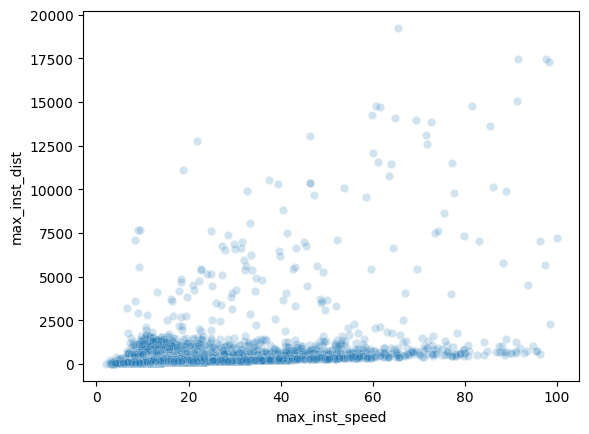

In [27]:
import seaborn as sns
sns.scatterplot(data = radar[radar["max_inst_speed"] < 100], x = "max_inst_speed", y = "max_inst_dist", alpha = 0.2)

In [28]:
from utils.map_display import *

def get_trajectory(trajectory_df, track_id):
    """
    Obtain the trajectory list of a given track id

    Args:
        trajectory_df: dataframe for trajectory
        track_id: track id
    
    Returns:
    A list of [[latitude, longitude]] in sorted time order.
    """
    detections = trajectory_df[trajectory_df["id_track"] == track_id]
    detections_sorted = detections.sort_values(by = "time", ascending=True)
    return detections_sorted[["latitude", "longitude"]].to_numpy()

# Selects some random observation where the ratio > 5:
problematic_radar = radar[np.logical_or(radar["max_inst_speed"] > 100, radar["max_inst_dist"] > 1000)]
id = problematic_radar.iloc[np.random.choice(len(problematic_radar))]["id_track"]
print(len(problematic_radar), id)
traj = get_trajectory(detections, id)
m = init_map(tuple(np.mean(traj, axis = 0)))
plot_trajectory(m, traj)



1422 43670026


Apply the disrupted track filter

In [ ]:
radar_data_filtered = radar_linked_bidirectional[np.logical_and(radar["max_inst_speed"] < 100, radar["max_inst_dist"] < 1000)]
len(radar_data_filtered)
radar_data_filtered.to_csv('../data/tracks_radar_linked_filtered.csv', index=False)

In [34]:
filtered_track_ids = set(radar_data_filtered["id_track"])
detection_radar_filtered = detections_cleaned[detections_cleaned["id_track"].isin(filtered_track_ids)]
detection_radar_filtered.to_csv("../data/detections_radar_linked_filtered.csv", index = False)

In [35]:
detections_smoothed = pd.read_csv("../data/detections_radar_smoothed.csv")
detections_smoothed_filtered = detections_smoothed[detections_smoothed["id_track"].isin(filtered_track_ids)]
detections_smoothed_filtered.to_csv("../data/detections_radar_smoothed_linked_filtered.csv", index = False)